#### Problem 1

In [1]:
using PyCall, PyPlot

#### Problem 1(a)

In [13]:
struct IVPproblem
    f::Function
    T::Int64
    y0::Vector
end
struct IVPsolution
    t::Vector
    y::Matrix
end

#### Problem 1(b)

In [95]:
function runge5(f,y0,h,N,t0 = 0)
    t = t0 .+ h*(0:N)
    y = zeros(N+1, length(y0))

    y[1,:] = y0
    for n = 1:N
        k1 = h * f(t[n], y[n,:])
        k2 = h * f(t[n] + h/5, y[n,:] + k1/5)
        k3 = h * f(t[n] + 2*h/5, y[n,:] + 2*k2 / 5)
        k4 = h * f(t[n] + h, y[n,:] + 9*k1/4 - 5*k2 + 15*k3/4 )
        #println("k4 is ", k4)
        k5 = h * f(t[n] + 3*h / 5, y[n,:] - 63*k1/100 + 9*k2/5 - 13 * k3 / 20 +8 * 2*k4/25)
        k6 = h * f(t[n] + 4*h / 5, y[n,:] - 6*k1/25 + 4*k2 / 5 + 2*k3/15 + 8*k4/75)
        y[n+1,:] = y[n,:] .+ (17*k1 + 100*k3 + 2*k4 - 50*k5 + 75*k6)/144
        println("Now we have ", (17*k1 + 100*k3 + 2*k4 - 50*k5 + 75*k6)/144," being added to ",y[n,:])
    end

    return t,y

end

runge5 (generic function with 3 methods)

#### Problem 1(c)

In [62]:
function runge5(ivp::IVPproblem, N::Integer)
    t,y = runge5(ivp.f,ivp.y0,(ivp.T)/N,N)
    return IVPsolution(t,y)
end

runge5 (generic function with 3 methods)

#### Problem 1(d)

Now we have [-0.09692172222222223] being added to [0.9030782777777777]
Now we have [-0.08752790198370061] being added to [0.8155503757940771]
Now we have [-0.0790445469809425] being added to [0.7365058288131345]
Now we have [-0.0713834133552742] being added to [0.6651224154578603]
Now we have [-0.06446480999478023] being added to [0.6006576054630801]
Now we have [-0.05821676958735781] being added to [0.5424408358757223]
Now we have [-0.05257430001673678] being added to [0.48986653585898554]
Now we have [-0.04747870831448686] being added to [0.4423878275444987]
Now we have [-0.04287699013576026] being added to [0.39951083740873844]
Now we have [-0.03872127840809714] being added to [0.3607895590006413]
the difference between the exact solution and the real solution is: [0.0; 0.0017591402581818016; 0.003180377283904745; 0.004312391868583343; 0.005197630577779; 0.005873054249553311; 0.006370800218304162; 0.006718767932423986; 0.0069411365727228835; 0.00705882233186067; 0.007089882170801032

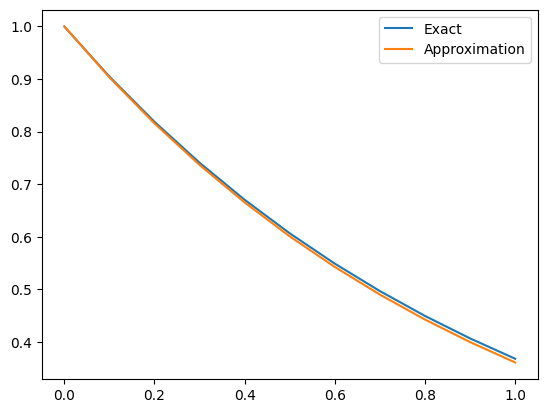

In [63]:
f(t,y) = -y
T = 1
N = 10
tt = 0:0.1:1
yexact(t) = exp(-t)
p = IVPproblem(f,T,[1])
sol = runge5(p,N)
plot(tt,yexact.(tt))
plot(sol.t,sol.y)
legend(("Exact","Approximation"))
println("the difference between the exact solution and the real solution is: ",yexact.(tt) .- sol.y)

#### Problem 2(a)


In [96]:
function safe_input(x)
    if abs(x-0) <= 2.75573137070700676789e-6
        return 0
    else
        return x
    end
end

function fpend(t,y)
    #return [y[3],y[4],(-3*sin(safe_input(y[1]))-sin(safe_input(y[1]-2*y[2]))-2*sin(safe_input(y[1]-y[2]))*((y[4])^2)+((y[3])^2)*cos(safe_input(y[1]-y[2])))/(3-cos(safe_input(2*y[1]-2*y[2]))),(2*sin(safe_input(y[1]-y[2]))*(2*(y[3])^2+2*cos(y[1])+((y[4])^2)*(cos(y[1]-y[2]))))/(3-cos(safe_input(2*y[1]-2*y[2])))]
    return [y[3],y[4],(-3*sin(safe_input(y[1]))-sin(safe_input(y[1]-2*y[2]))-2*sin(safe_input(y[1]-y[2]))*((y[4])^2)+((y[3])^2)*cos(y[1]-y[2]))/(3-cos(2*y[1]-2*y[2])),(2*sin(safe_input(y[1]-y[2]))*(2*(y[3])^2+2*cos(y[1])+((y[4])^2)*(cos(y[1]-y[2]))))/(3-cos(2*y[1]-2*y[2]))]
end

fpend (generic function with 1 method)

In [101]:
#test = [186275.36285052175, -799433.7743810123, -3.4199072493569224e12, 3.6117996602529155e12] + [186273.1752317127, -799507.302802264, -3.4199072493118643e12, 3.6117996602840957e12] 
#fpend(0,test)
1/0
0/0

NaN

#### Problem 2(b)

Now we have [-0.01108444371809152, -0.20010204592785058, -0.1891376878210851, 0.001464337820227901] being added to [2.0, 2.0, 0.0, -1.0]
Now we have [-0.05014911113673342, -0.19944526051946498, -0.2056427487330502, 0.012401156196643625] being added to [1.9889155562819085, 1.7998979540721494, -0.1891376878210851, -0.9985356621797721]
Now we have [-0.09198038027241151, -0.1957384189322736, -0.21294514166569345, 0.04023700950016045] being added to [1.9387664451451752, 1.6004526935526844, -0.3947804365541353, -0.9861345059831285]
Now we have [-0.13466584126884631, -0.1851206165095097, -0.20904323328976956, 0.08868383694638357] being added to [1.8467860648727636, 1.4047142746204109, -0.6077255782198288, -0.9458974964829681]
Now we have [-0.17571513527335814, -0.1636053738432307, -0.19000941634592394, 0.151523827877459] being added to [1.7121202236039172, 1.2195936581109013, -0.8167688115095983, -0.8572136595365845]
Now we have [-0.21187593455566925, -0.12905017611930378, -0.1534096011226958

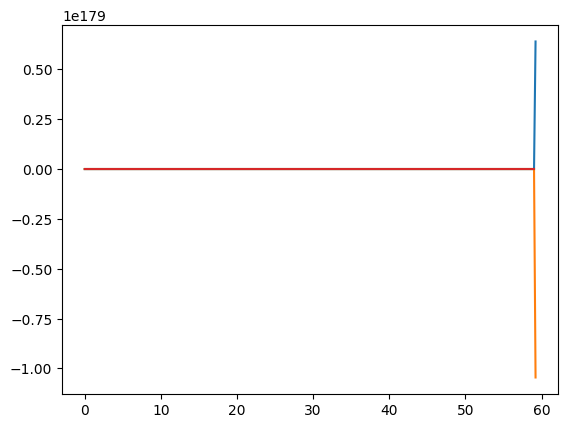

501×4 Matrix{Float64}:
   2.0          2.0         0.0        -1.0
   1.98892      1.7999     -0.189138   -0.998536
   1.93877      1.60045    -0.39478    -0.986135
   1.84679      1.40471    -0.607726   -0.945897
   1.71212      1.21959    -0.816769   -0.857214
   1.53641      1.05599    -1.00678    -0.70569
   1.32453      0.926938   -1.16019    -0.49444
   1.0849       0.843184   -1.26041    -0.262012
   0.829146     0.804013   -1.29345    -0.108326
   0.571332     0.784352   -1.25682    -0.158997
   0.324269     0.740143   -1.17069    -0.412068
   0.0968072    0.636944   -1.04132    -0.766735
  -0.101345     0.459999   -0.84819    -1.14812
   ⋮                                  
 NaN          NaN         NaN         NaN
 NaN          NaN         NaN         NaN
 NaN          NaN         NaN         NaN
 NaN          NaN         NaN         NaN
 NaN          NaN         NaN         NaN
 NaN          NaN         NaN         NaN
 NaN          NaN         NaN         NaN
 NaN          N

In [97]:
y0 = [2,2,0,-1]
T = 100
N = 500

q = IVPproblem(fpend,T,y0)
sol = runge5(q,N)

plot(sol.t,sol.y[:,1])
plot(sol.t,sol.y[:,2])
plot(sol.t,sol.y[:,3])
plot(sol.t,sol.y[:,4])
sol.y

In [19]:
#d = pyimport("IPython.display")
@pyimport IPython.display as d
function anim(sol::IVPsolution)
    animation = pyimport("matplotlib.animation");
    fig, ax = subplots(figsize=(5,5))
    function update(frame)
        θ1 = sol.y[frame+1,1]
        θ2 = sol.y[frame+1,2]
        p1 = [sin(θ1),-cos(θ1)]
        p2 = p1 .+ [sin(θ2),-cos(θ2)]
        ax.clear()
        ax.plot([0,p1[1],p2[1]], [0,p1[2],p2[2]], linewidth=2)
        ax.add_artist(matplotlib.patches.Circle(p1, 0.1))
        ax.add_artist(matplotlib.patches.Circle(p2, 0.1))
        ax.set_xlim([-2.5,2.5])
        ax.set_ylim([-2.5,2.5])
    end

    ani = animation.FuncAnimation(fig, update, frames=length(sol.t), interval=50)
    close(ani._fig)
    d.HTML(ani.to_jshtml())
end

LoadError: PyError (PyImport_ImportModule

The Python package IPython.display could not be imported by pyimport. Usually this means
that you did not install IPython.display in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/usr/bin/python3

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the IPython.display module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the IPython.display module, you can use `pyimport_conda("IPython.display", PKG)`,
where PKG is the Anaconda package that contains the module IPython.display,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'IPython'")
